In [1]:
%matplotlib inline

import suPAErnova as snpae
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Some useful paths to have access to
cwd = Path.cwd()
examples_dir = cwd.parent.parent
data_dir = examples_dir / "suPAErnova_data" # Put your data into this directory

2025-03-10 22:22:57.571908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 22:22:57.572538: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-10 22:22:57.575129: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-10 22:22:57.582101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741605777.592864   17786 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741605777.59

# Global Configuration

In [2]:
verbose = False # Increase log verbosity
force = False # Rerun all steps every time

cfg = snpae.setup_global_config({}, verbose=verbose, force=force) # Just pass an empty dictionary to initialise

Logging to /home/patricka/PARA/Projects/suPAErnova/examples/DATA/callbacks/output/supaernova.log


# Data Configuration

In [3]:
# Note that these keys *MUST* be captilalised. This is not the case when using a `suPAErnova.toml` config file.
data_cfg = {
    # === Required Keys ===

    # Path to directory containing data.
    #   Can be absolute or relative to the base path.
    "DATA_DIR": str(data_dir), # Needs to be a string so that SuPAErnova can validate it
    
    # Metadata CSV containing SN names and SALT fit parameters.
    #   Can be absolute or relative to the data path.
    "META": "meta.csv",

    # TXT file containing additional SALT fit parameters.
    #   Can be absolute or relative to the data path.
    "IDR": "IDR_eTmax.txt",

    # TXT file containing a mask of bad spectra / wavelength ranges.
    #   Can be absolute or relative to the data path.
    "MASK": "mask_info_wmin_wmax.txt",

    # === Optional Keys ===

    # Which assumed cosmology to use when running SALT models.
    #   Available cosmological can be found [here](https://docs.astropy.org/en/stable/cosmology/realizations.html)
    #   Defaults to WMAP7
    "COSMOLOGICAL_MODEL": "WMAP7",

    # The absolute path to an existing SALT2/3 model, or the name of an existing SNCosmo SALT2/3 model.
    #   Defaults to salt3
    "SALT_MODEL": "salt3",

    # Minimum phase for spectral data, relative to peak. Spectral data earlier than this phase will be cut.
    #   Defaults to -10.0
    "MIN_PHASE": -10,

    # Maximum phase for spectral data, relative to peak. Spectral data later than this phase will be cut.
    #   Defaults to 40.0
    "MAX_PHASE": 40,

    # The fraction of data to be used for training, with the rest of the data going to testing and validation.
    #   Defaults to 0.75
    "TRAIN_FRAC": 0.75,

    # The seed used throughout data preperation, in particular for randomly splitting the data into training, testing, and validation bins.
    #   Defaults to 12345
    "SEED": 12345,

    # === Analysis Keys ===
    "ANALYSIS": {
        # Which spectra to plot
        #    str: The name of a single spectrum to plot
        #    list[str]: Names of each spectrum to plot
        #    True: Plot every spectrum
        "PLOT_SPECTRA": "CSS110918_01"
    }
}

cfg["DATA"] = data_cfg

# Callbacks
The easiest way to interact with the `SuPAErnova` pipeline, without having to delve into the source code, is through callback functions. These are user-defined functions which run before and after different stages within each step. When using a `suPAErnova.toml` file, these callback function are defined in scripts, with the path to these scripts provided in the confg file. Here you can directly define your functions and pass them in.

In [4]:
callbacks = {}

# analyse
def pre_analyse(self) -> None:
    print("pre-analyse callback")

def post_analyse(self) -> None:
    print("post-analyse callback")

callbacks["ANALYSE"] = {"PRE": pre_analyse, "POST": post_analyse}

# calculate_laser_line_mask
def pre_calculate_laser_line_mask(self) -> None:
    print("pre-calculate_laser_line_mask callback")

def post_calculate_laser_line_mask(self) -> None:
    print("post-calculate_laser_line_mask callback")

callbacks["CALCULATE_LASER_LINE_MASK"] = {"PRE": pre_calculate_laser_line_mask, "POST": post_calculate_laser_line_mask}

# calculate_salt_flux
def pre_calculate_salt_flux(self) -> None:
    print("pre-calculate_salt_flux callback")

def post_calculate_salt_flux(self) -> None:
    print("post-calculate_salt_flux callback")

callbacks["CALCULATE_SALT_FLUX"] = {"PRE": pre_calculate_salt_flux, "POST": post_calculate_salt_flux}

# calculate_wavelength_mask
def pre_calculate_wavelength_mask(self) -> None:
    print("pre-calculate_wavelenth_mask callback")

def post_calculate_wavelength_mask(self) -> None:
    print("post-calculate_wavelength_mask callback")

callbacks["CALCULATE_WAVELENGTH_MASK"] = {"PRE": pre_calculate_wavelength_mask, "POST": post_calculate_wavelength_mask}

# finalise_data
def pre_finalise_data(self) -> None:
    print("pre-finalise_data callback")

def post_finalise_data(self) -> None:
    print("post-finalise_data callback")

callbacks["FINALISE_DATA"] = {"PRE": pre_finalise_data, "POST": post_finalise_data}

# get_dims
def pre_get_dims(self) -> None:
    print("pre-get_dims callback")

def post_get_dims(self) -> None:
    print("post-get_dims")

callbacks["GET_DIMS"] = {"PRE": pre_get_dims, "POST": post_get_dims}

# load_data
def pre_load_data(self) -> None:
    print("pre-load_data callback")

def post_load_data(self) -> None:
    print("post-load_data callback")

callbacks["LOAD_DATA"] = {"PRE": pre_load_data, "POST": post_load_data}

# result
def pre_result(self) -> None:
    print("pre-result callback")

def post_result(self) -> None:
    print("post-result callback")

callbacks["RESULT"] = {"PRE": pre_result, "POST": post_result}

# run
def pre_run(self) -> None:
    print("pre-run callback")

def post_run(self) -> None:
    print("post-run callback")

callbacks["RUN"] = {"PRE": pre_run, "POST": post_run}

# setup
def pre_setup(self) -> None:
    print("pre-setup callback")

def post_setup(self) -> None:
    print("post-setup callback")

callbacks["SETUP"] = {"PRE": pre_setup, "POST": post_setup}

# split_train_test
def pre_split_train_test(self) -> None:
    print("pre-split_train_test callback")

def post_split_train_test(self) -> None:
    print("post-split_train_test callback")

callbacks["SPLIT_TRAIN_TEST"] = {"PRE": pre_split_train_test, "POST": post_split_train_test}

# transform_data
def pre_transform_data(self) -> None:
    print("pre-transform_data callback")

def post_transform_data(self) -> None:
    print("post-transform_data callback")

callbacks["TRANSFORM_DATA"] = {"PRE": pre_transform_data, "POST": post_transform_data}

# validate
def pre_validate(self) -> None:
    print("pre-validate callback")

def post_validate(self) -> None:
    print("post-validate callback")

callbacks["VALIDATE"] = {"PRE": pre_validate, "POST": post_validate}


cfg["DATA"]["CALLBACKS"] = callbacks

data = snpae.steps.Data(cfg)
print(data)

DATA:
    Is Setup: False
    Has Run: False
    Global Config: {'VERBOSE': False, 'FORCE': True, 'BASE': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/DATA/callbacks'), 'OUTPUT': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/DATA/callbacks/output'), 'RESULTS': {}, 'LOG': <module 'suPAErnova.utils.suPAErnova_logging' from '/home/patricka/PARA/Projects/suPAErnova/src/suPAErnova/utils/suPAErnova_logging.py'>}
    DATA Options: {'DATA_DIR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data'), 'META': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/meta.csv'), 'IDR': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/IDR_eTmax.txt'), 'MASK': PosixPath('/home/patricka/PARA/Projects/suPAErnova/examples/suPAErnova_data/mask_info_wmin_wmax.txt'), 'COSMOLOGICAL_MODEL': FlatLambdaCDM(name='WMAP7', H0=<Quantity 70.4 km / (Mpc s)>, Om0=0.272, Tcmb0=<Quantity 2.725 K>, Neff=3.04, m_nu=<Quantit

Setting up DATA
Running DATA


pre-setup callback
post-setup callback
pre-run callback
pre-load_data callback
post-load_data callback
pre-calculate_salt_flux callback
post-calculate_salt_flux callback
pre-transform_data callback
pre-get_dims callback
post-get_dims


Storing DATA results


post-transform_data callback
pre-calculate_wavelenth_mask callback
post-calculate_wavelength_mask callback
pre-calculate_laser_line_mask callback
post-calculate_laser_line_mask callback
pre-finalise_data callback
post-finalise_data callback
pre-split_train_test callback
post-split_train_test callback
post-run callback
pre-result callback


Finished running DATA
Analysing DATA
Plotting Spectra


post-result callback
pre-analyse callback
post-analyse callback


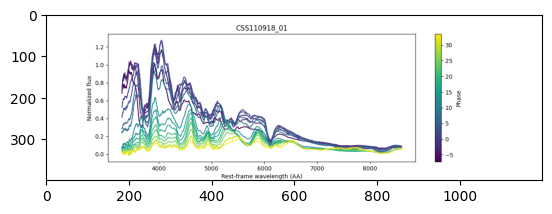

In [5]:
# Note that because of how Jupyter captures output, `print()` style messages might not be ordered correctly relative to `log.info()` style messages.
success, result = data.setup()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error running setup: {result}")
success, result = data.run()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error running: {result}")
success, result = data.result()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error saving results: {result}")
success, result = data.analyse()
if not success: # Make sure you handle failures appropriately!
    data.log.error(f"Error analysing: {result}")
img = mpimg.imread(data.plotpath / "CSS110918_01.png")
imgplot = plt.imshow(img)
plt.show()